# Data Wrangling 

In [27]:
#Imports the neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the csv file and examine the first rows for the first glance
math_df = pd.read_csv('student-mat.csv',header = 0, delimiter = ';')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
#summarizing the data to see if there would be any missing data and to verify the data type
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
# reviewiewing the dataset indicates that even though there are columns with numerical values but they are actually
#categorical. Therefore, we will make saparate groups of columns (numerical-num and label-lab)

In [30]:
num_col = ['age','failures','absences','G1','G2','G3']
print(num_col)

['age', 'failures', 'absences', 'G1', 'G2', 'G3']


In [31]:
#generate quick statistical summary of the numerical columns
num_df = math_df[num_col]
num_df.describe()

,age,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [32]:
#columns with categorical data
lab_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2','G3']
print(lab_col)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']


# Visualization and Statistics

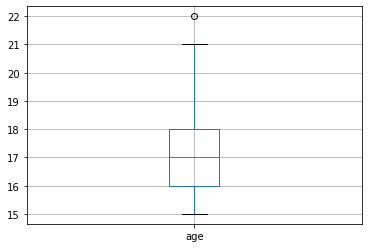

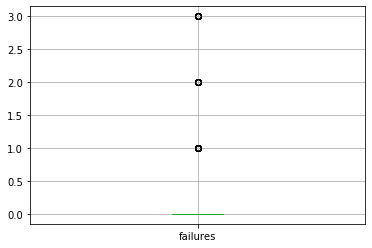

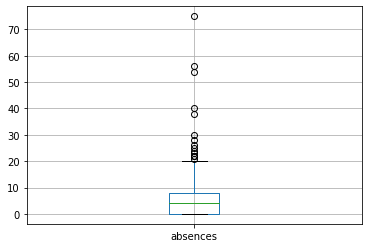

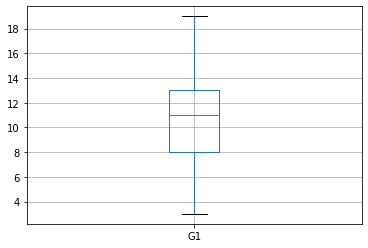

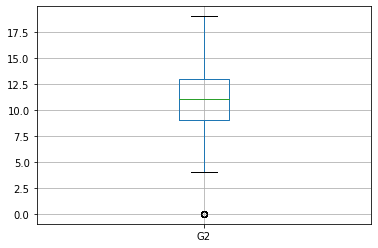

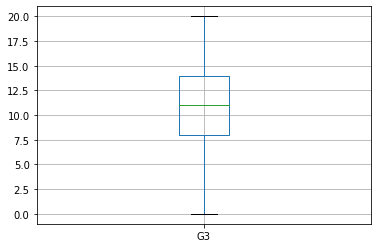

In [33]:
for column in num_col:
    plt.figure()
    math_df.boxplot([column])

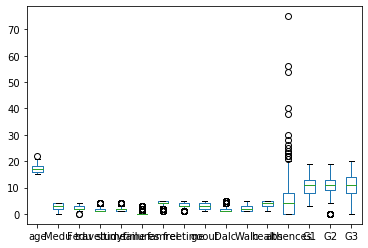

In [34]:
math_df.plot(kind = 'box')

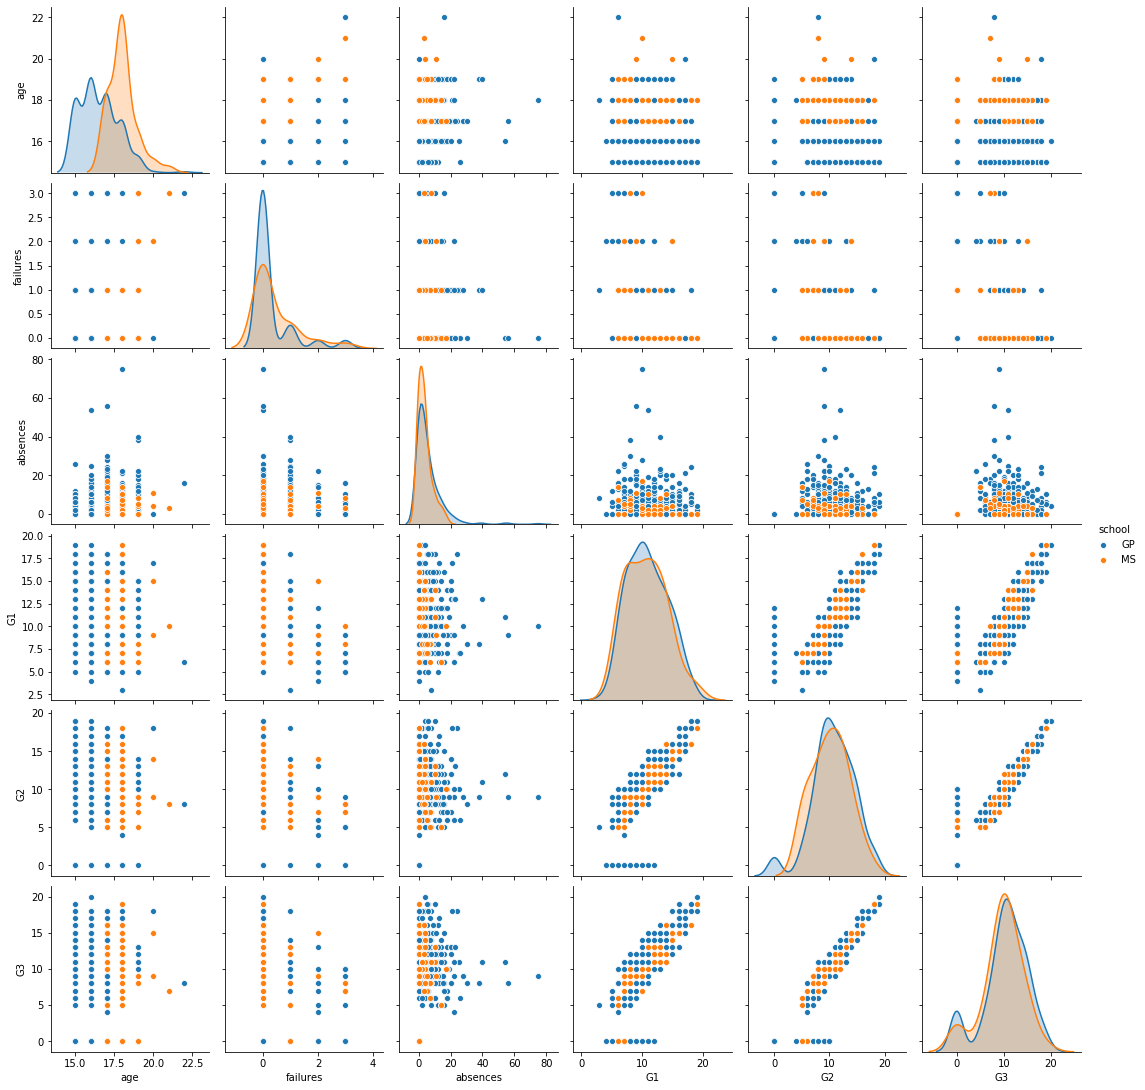

In [35]:
#plots correlation matrix for each school
import seaborn as sns
sns.pairplot(math_df, x_vars = num_col, y_vars = num_col, hue = 'school', diag_kind = 'kde')

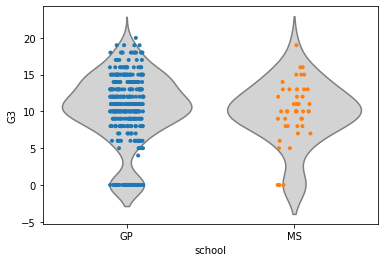

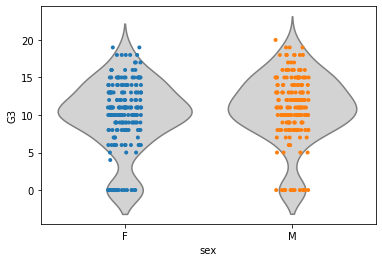

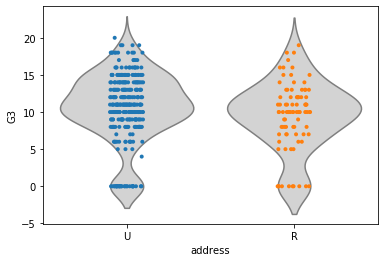

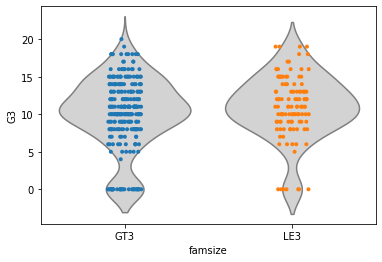

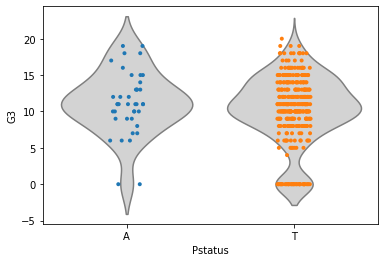

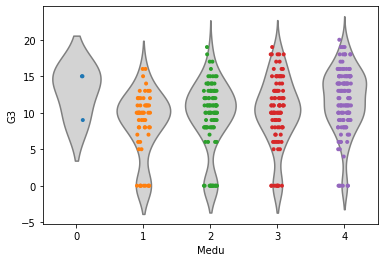

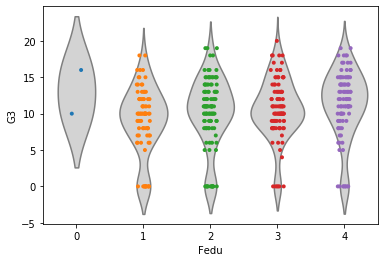

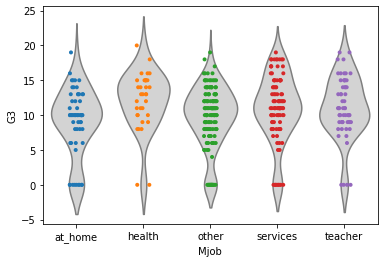

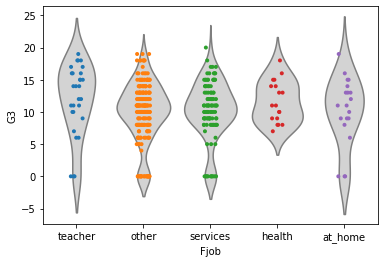

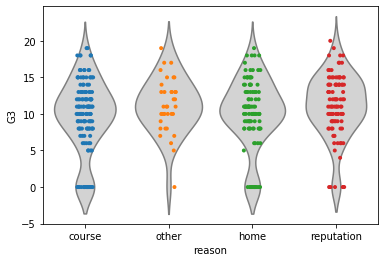

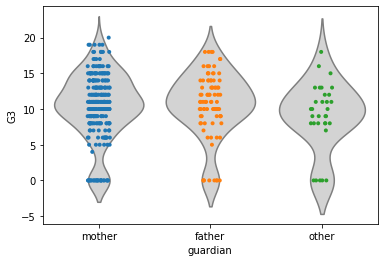

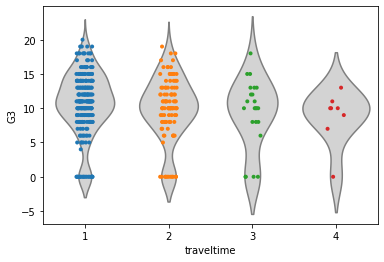

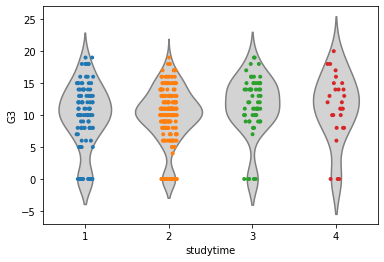

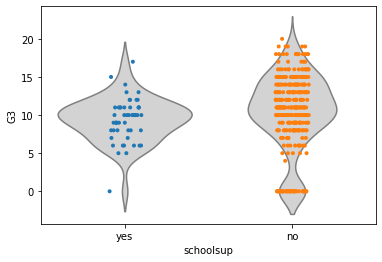

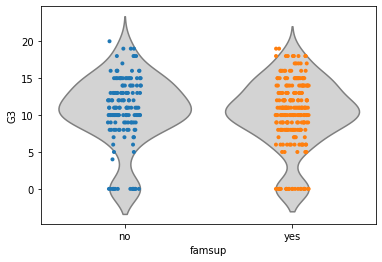

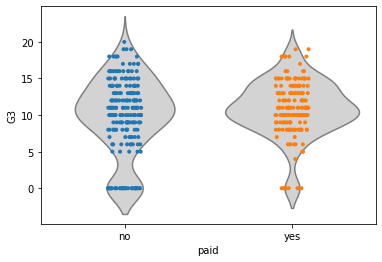

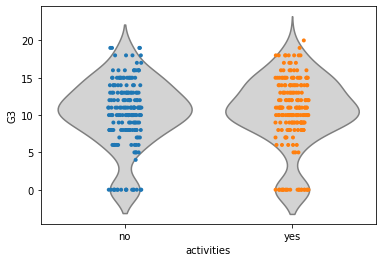

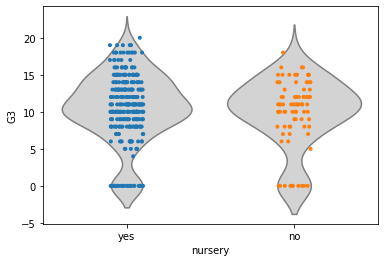

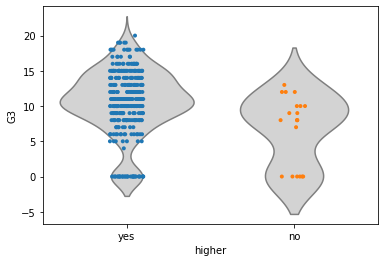

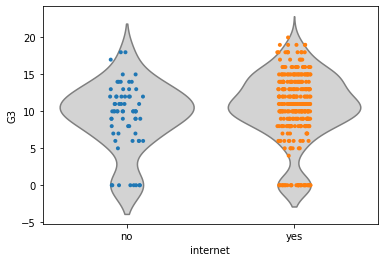

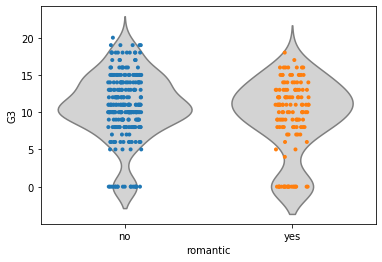

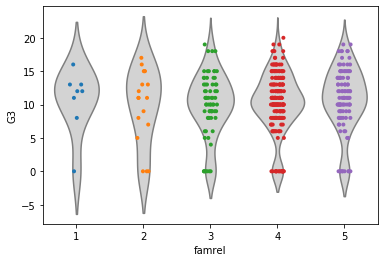

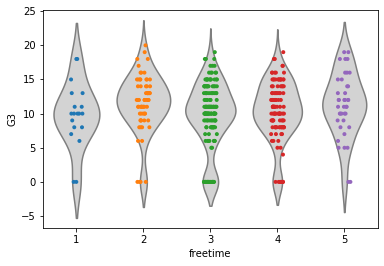

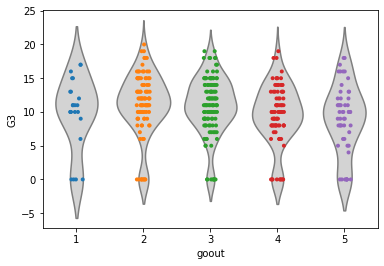

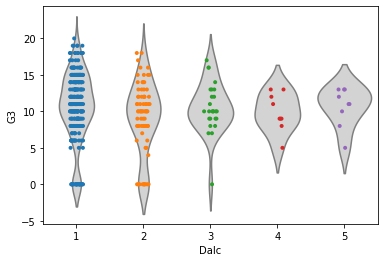

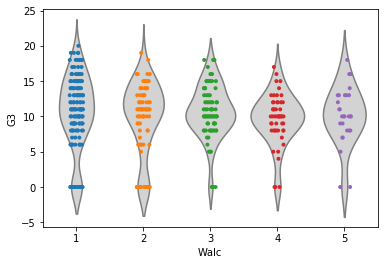

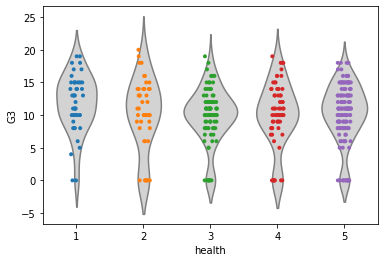

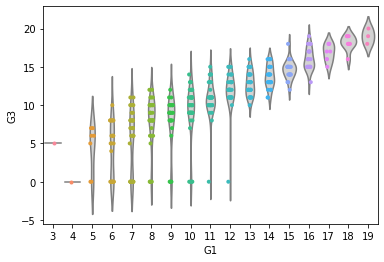

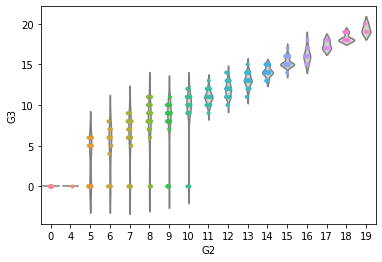

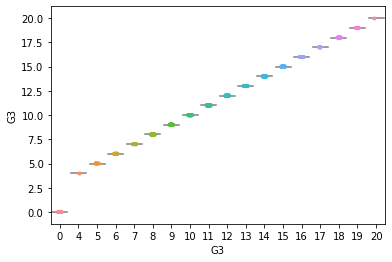

In [36]:
#putting vilolin plot for G3 score versus other variables if there would be signigicance difference 
#between the groups and correlations with G3
for col in lab_col:
    sns.violinplot(x= col, y='G3', data=math_df, inner=None, color='lightgray')
    sns.stripplot(x= col, y='G3', data=math_df, size=4, jitter=True) 
    plt.ylabel('G3') 
    plt.show()

In [37]:
# there is a high correlation between G3 and G1, G2. G3 does not seems to have a strong correlation with other variables.

# students who performs well in G1 tend to perform well in G2 and G3

# the correlation matrix indicates that the other predictor variables are independent on each other.

# there are different distributions for some variables (school) but the violin plot does not signify or much different
# in terms of correlation to G3. 

In [38]:
# we are going to try performing pair bootstrap to see how the correlation between G3 and G1 would change

#define a function to do pairs bootstrap
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[1.03034898 1.18845337]


C:\Users\17138\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


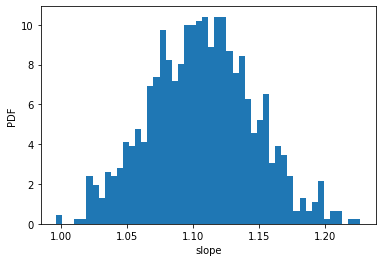

In [39]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    math_df['G1'], math_df['G3'], size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

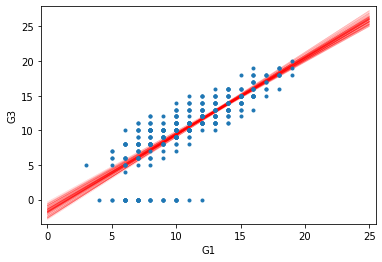

In [40]:
#plotting bootstrap regression

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 25])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(math_df['G1'], math_df['G3'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('G1')
_ = plt.ylabel('G3')
plt.margins(0.02)
plt.show()

In [41]:
# we can clearly see that linear regression cannot model of the data which is not outliers. In addition, as we need to
#involve other categorical variables, we can consider other tree base prediction algorithsms.

Statistical Analysis
By eyeballing, we see that the two school has almost identical G3 and Absences distribution. I am trying to use statistical analysis to test this hypothesis

In [42]:
math_GP = math_df.loc[math_df['school']=='GP','G3']
math_MS = math_df.loc[math_df['school']=='MS','G3']

In [43]:
#Generating Permutation Sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



In [44]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


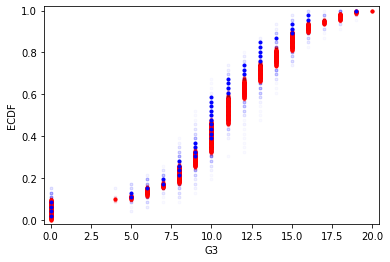

In [45]:
#Visualizing Permutation Sampling
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(math_GP, math_MS)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(math_GP)
x_2, y_2 = ecdf(math_MS)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('G3')
_ = plt.ylabel('ECDF')
plt.show()

In [46]:
#Generating Permutation Replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [47]:
#Permutation Test

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(math_GP, math_MS)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(math_GP, math_MS,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.1901


In [48]:
#There are 19% we would get difference in mean of G3 for two schools

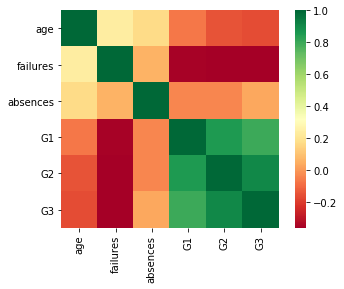

In [49]:
#Correlation Heatmap Between Numerical Features

sns.heatmap(num_df.corr(), square=True, cmap='RdYlGn')

# Prediction

In [50]:
#label encoder
from sklearn import preprocessing    
def convert(data):
    for column in math_df.columns:
        if math_df[column].dtype == type(object):
            le = preprocessing.LabelEncoder()
            math_df[column] = le.fit_transform(math_df[column])
            
convert(math_df)

In [51]:
# Create arrays for the features and the response variable
y = math_df['G3'].values
X = math_df.drop('G3', axis=1).values

#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [52]:
#Create RF Instance

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)


from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [53]:
#Create GB instance

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
# max_features=4, learning_rate=0.01, n_estimators=200, subsample=0.6, random_state=42
gbr.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
#Check the test samples
y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
print("R^2_rf: {}".format(random_forest.score(X_test, y_test)))
print("R^2_gb: {}".format(gbr.score(X_test, y_test)))

R^2_rf: 0.8782538792989939
R^2_gb: 0.8522383905431214


In [55]:
#Cross Validation

from sklearn.model_selection import cross_val_score
cv_results_rf = cross_val_score(random_forest, X_train, y_train, cv=5).mean()
cv_results_gbr = cross_val_score(gbr, X_train, y_train, cv=5).mean()
print(cv_results_rf)
print(cv_results_gbr)

0.8449520995220642
0.8450283413614367


In [56]:
#gradient boosting yields a little higher accuracy. We will optimize and evaluate both models

In [57]:
#Optimizing Hyperparameter for RF

from sklearn.model_selection import ParameterGrid
grid_rf = {'n_estimators': [200, 250], 'max_depth':[3, 4, 5, 6, 7], 'max_features': [2,3,4,5,6,7,8,9,10,15,20,25,32]}
from pprint import pprint
pprint(list(ParameterGrid(grid_rf)))


[{'max_depth': 3, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 2, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 3, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 4, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 4, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 5, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 5, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 6, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 6, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 7, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 7, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 8, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 8, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 9, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 9, 'n_estimators': 250},
 {'max_depth': 3, 'max_features': 10, 'n_estimators': 20

In [58]:
#Tuning Hyperparameters for RF Models
test_scores_rf = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(grid_rf):
    random_forest.set_params(**g) # ** is "unpacking" the dictionary
    random_forest.fit(X_train, y_train)
    test_scores_rf.append(random_forest.score(X_test, y_test))
# find best hyperparameters from the test score and print
best_idx_rf = np.argmax(test_scores_rf)
print(test_scores_rf[best_idx_rf])
print(ParameterGrid(grid_rf)[best_idx_rf])

0.8825740716102047
{'n_estimators': 250, 'max_features': 32, 'max_depth': 7}


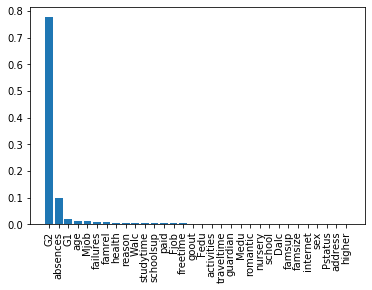

In [59]:
#Feature Importance of RF
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
importances = random_forest.feature_importances_

# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
# create tick labels
feature_names = math_df.columns
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [60]:
print(labels)

['G2' 'absences' 'G1' 'age' 'Mjob' 'failures' 'famrel' 'health' 'reason'
 'Walc' 'studytime' 'schoolsup' 'paid' 'Fjob' 'freetime' 'goout' 'Fedu'
 'activities' 'traveltime' 'guardian' 'Medu' 'romantic' 'nursery' 'school'
 'Dalc' 'famsup' 'famsize' 'internet' 'sex' 'Pstatus' 'address' 'higher']


In [61]:
#Optimizing Hyperparameter for GB

from sklearn.model_selection import ParameterGrid
grid_gb = {'n_estimators': [200, 250], 'subsample':[0.5,0.5,0.7],'learning_rate':[0.005,0.01,0.02, 0.03], 'max_features': [2,3,4,5,6,7,8,9,10,15,20,25,32]}
#max_features=4, learning_rate=0.01, n_estimators=200, subsample=0.6

In [62]:
#Tuning Hyperparameters for GB Models
test_scores_gb = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(grid_gb):
    gbr.set_params(**g) # ** is "unpacking" the dictionary
    gbr.fit(X_train, y_train)
    test_scores_gb.append(gbr.score(X_test, y_test))
# find best hyperparameters from the test score and print
best_idx_gb = np.argmax(test_scores_gb)
print(test_scores_gb[best_idx_gb])
print(ParameterGrid(grid_gb)[best_idx_gb])

0.8763984362134317
{'subsample': 0.5, 'n_estimators': 200, 'max_features': 32, 'learning_rate': 0.03}


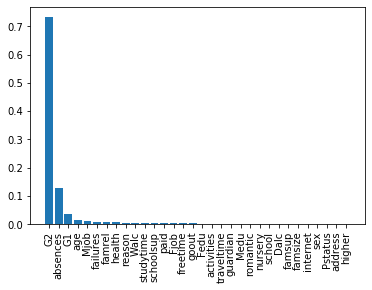

In [63]:
#GB Feature Importance
importances_gbr = gbr.feature_importances_

# index of greatest to least feature importances
sorted_index_gbr = np.argsort(importances_gbr)[::-1]
x = range(len(importances))
# create tick labels
feature_names = math_df.columns
labels_gbr = np.array(feature_names)[sorted_index_gbr]
plt.bar(x, importances_gbr[sorted_index_gbr], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [64]:
print(labels_gbr)

['G2' 'absences' 'G1' 'age' 'Mjob' 'failures' 'famrel' 'studytime' 'Walc'
 'paid' 'Fjob' 'schoolsup' 'guardian' 'activities' 'health' 'reason'
 'goout' 'Dalc' 'Medu' 'freetime' 'Fedu' 'traveltime' 'higher' 'address'
 'sex' 'famsize' 'school' 'romantic' 'internet' 'nursery' 'Pstatus'
 'famsup']


In [65]:
#Though GB performs better with the training set, RF performs a bit better with the test set. 
#The two models also suggest similar important variables. 